In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,0.0,0.0
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,0.0,0.0
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-06-21 00:00:00-04:00', '2024-06-24 00:00:00-04:00',
               '2024-06-25 00:00:00-04:00', '2024-06-26 00:00:00-04:00',
               '2024-06-27 00:00:00-04:00', '2024-06-28 00:00:00-04:00',
               '2024-07-01 00:00:00-04:00', '2024-07-02 00:00:00-04:00',
               '2024-07-03 00:00:00-04:00', '2024-07-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24243, freq=None)

<Axes: xlabel='Date'>

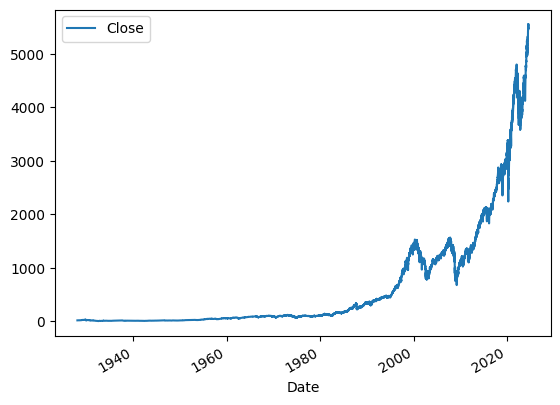

In [6]:
sp500.plot.line(y='Close', use_index = True)

In [7]:
# data cleaning: we remove dividend and stock splits (not related to index, these are related to individual stocks)
del sp500['Dividends']
del sp500['Stock Splits']

In [8]:
# create a tomorrow column and shift the closing price by 1
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020


In [9]:
# create a target column to check to see if tommorow is greater than today. Returns a boolean value, and there we use .astype(int) to show it in the form of integers
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1


In [10]:
# Only consider data from 2000-01-01 onwards, as the data before that is not reliable.
# .copy() is used to avoid the SettingWithCopyWarning
sp500 = sp500.loc["2000-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1


In [11]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of trees in the forest
# min_samples_split = minimum number of samples required to split an internal node(prevents overfitting)
# random_state = seed for random number generator(ensures any random number generated is the same every time, this helps with debugging)

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Open", "High", "Low", "Close", "Volume"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [12]:
import pandas as pd

preds = model.predict(test[predictors])
preds = pd.Series(preds, test.index)

preds

Date
2024-02-12 00:00:00-05:00    1
2024-02-13 00:00:00-05:00    1
2024-02-14 00:00:00-05:00    1
2024-02-15 00:00:00-05:00    1
2024-02-16 00:00:00-05:00    1
                            ..
2024-06-28 00:00:00-04:00    0
2024-07-01 00:00:00-04:00    1
2024-07-02 00:00:00-04:00    1
2024-07-03 00:00:00-04:00    1
2024-07-05 00:00:00-04:00    0
Length: 100, dtype: int64

In [13]:
from sklearn.metrics import precision_score

precision_score(test["Target"], preds)

0.5625

<Axes: xlabel='Date'>

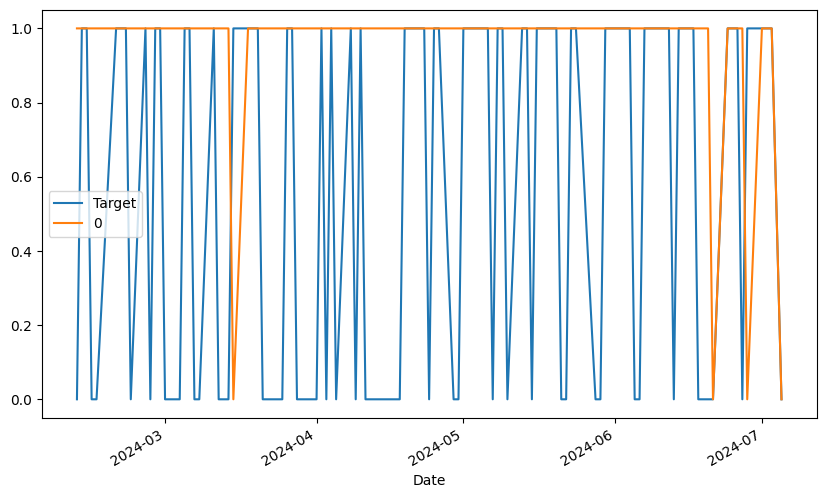

In [14]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot(figsize=(10, 6))

In [23]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [24]:
def backtest(data, model, predictors, start = 2500, step = 250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [25]:
predictions = backtest(sp500, model, predictors)

In [26]:
predictions["Predictions"].value_counts()

Predictions
1    1833
0    1832
Name: count, dtype: int64

In [29]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5275504637206765

In [31]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.544611
0    0.455389
Name: count, dtype: float64

In [33]:
# horizons are trading days
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [36]:
sp500 = sp500.dropna()

In [38]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1094.040039,1098.469971,1094.040039,1095.890015,356070000,1109.479980,1,1.000845,1.0,1.002176,3.0,1.039354,34.0,1.137825,135.0,0.957328,485.0
2003-12-29 00:00:00-05:00,1095.890015,1109.479980,1095.890015,1109.479980,1058800000,1109.640015,1,1.006162,2.0,1.010755,4.0,1.050761,34.0,1.150837,135.0,0.969445,486.0
2003-12-30 00:00:00-05:00,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,1111.920044,1,1.000072,2.0,1.007835,4.0,1.049591,34.0,1.150046,135.0,0.969833,486.0
2003-12-31 00:00:00-05:00,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,1108.479980,0,1.001026,2.0,1.006997,4.0,1.050463,34.0,1.151439,136.0,0.972073,486.0
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,1122.219971,1,0.998451,1.0,1.001263,4.0,1.046073,33.0,1.147024,135.0,0.969348,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 00:00:00-04:00,5473.589844,5490.810059,5467.540039,5482.870117,3589530000,5460.479980,0,1.000453,2.0,1.002626,3.0,1.045593,35.0,1.145870,141.0,1.295096,530.0
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1,0.997954,1.0,0.998682,3.0,1.040500,34.0,1.140228,140.0,1.289110,529.0
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1,1.001336,1.0,1.000358,4.0,1.042198,35.0,1.142306,140.0,1.291851,530.0


In [39]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [40]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [41]:
predictions = backtest(sp500, model, new_predictors)

In [43]:
predictions ["Predictions"].value_counts()

Predictions
0.0    2225
1.0     439
Name: count, dtype: int64

In [44]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5375854214123007